In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
dados = pd.read_csv("artificial1d.csv")

In [4]:
#PRÉ-PROCESSAMENTO

dados.head(6)

type(dados["-1,00E+18"][5])

#Convertendo string para float

dd =  dados.apply(lambda x: x.str.replace(',', '.').astype(float) if x.dtype == "object" else x)

dd["-1,00E+18"]

dd.shape



(29, 2)

MSE: 2.0787509315083062e+35
Weights: [8.73416099e+17]
Bias: 1.4108275862068962e+17


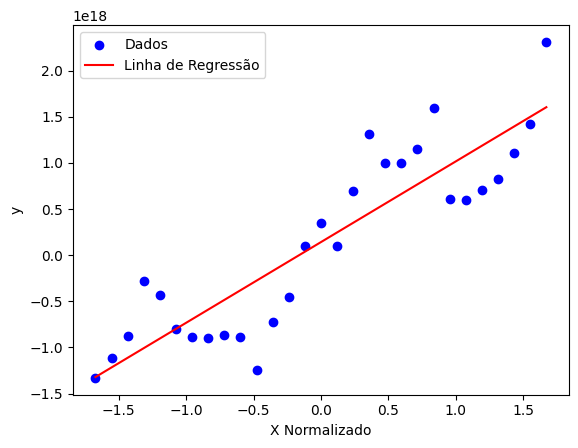

In [5]:
# Simular dados de entrada (X) e saída (y)


X = dd["-1,00E+18"].values.reshape(-1, 1)  # Transforma em array numpy 2D
y = dd["-2,08E+18"].values.reshape(-1, 1)  # Garante que y também seja 2D para alinhamento

#Normalizando os dados de entrada X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é sua matriz de características


class LinearRegressionGD:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y
            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Criar e treinar o modelo com dados normalizados
model = LinearRegressionGD()
model.fit(X_scaled, y)

# Fazer previsões
predictions = model.predict(X_scaled)

# Calcular o MSE
mse = np.mean((predictions - y) ** 2)

print(f"MSE: {mse}")
print(f"Weights: {model.weights.flatten()}")
print(f"Bias: {model.bias}")

# Plotar os dados e a linha de regressão com matplotlib 
plt.scatter(X_scaled, y, color='blue', label='Dados')
plt.plot(X_scaled, predictions, color='red', label='Linha de Regressão')
plt.xlabel('X Normalizado')
plt.ylabel('y')
plt.legend()
plt.show()






MSE: 2.078750931508306e+35
Parâmetros (theta): [1.41082759e+17 8.73416099e+17]


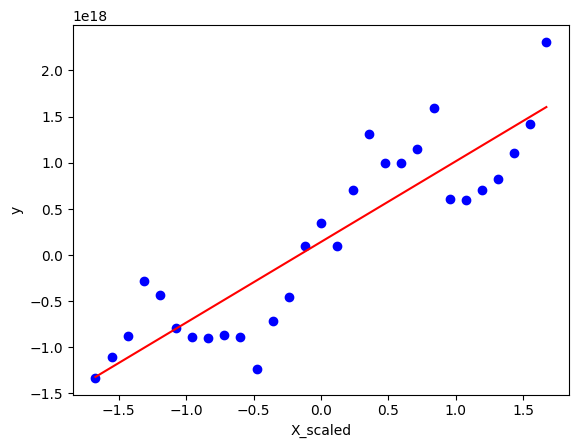

In [6]:


class Regression_OML:
    def __init__(self):
        self.theta = None  # Inicializa os parâmetros do modelo como None

    def fit(self, X, y):
        # Adiciona uma coluna de 1s para intercepto ao X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        # Calcula os parâmetros ótimos usando a Equação Normal
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Adiciona uma coluna de 1s para intercepto ao X para previsão
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        # Retorna as previsões
        return X_b.dot(self.theta)

    def mean_squared_error(self, X, y):
        # Calcula o MSE
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)



model = Regression_OML()  # Cria a instância da classe
model.fit(X_scaled , y)  # Treina o modelo

predictions = model.predict(X_scaled)  # Faz previsões com os dados de entrada

mse = model.mean_squared_error(X_scaled, y)  # Calcula o MSE
print(f"MSE: {mse}")
print(f"Parâmetros (theta): {model.theta.flatten()}")

# Plotando os dados e a linha de regressão com matplotlib
plt.scatter(X_scaled, y, color='blue')
plt.plot(X_scaled, predictions, color='red')
plt.xlabel('X_scaled')
plt.ylabel('y')
plt.show()


MSE: 2.0846313156237007e+35
Weights: [[8.79075038e+17]]
Bias: 1.6466272516858528e+17


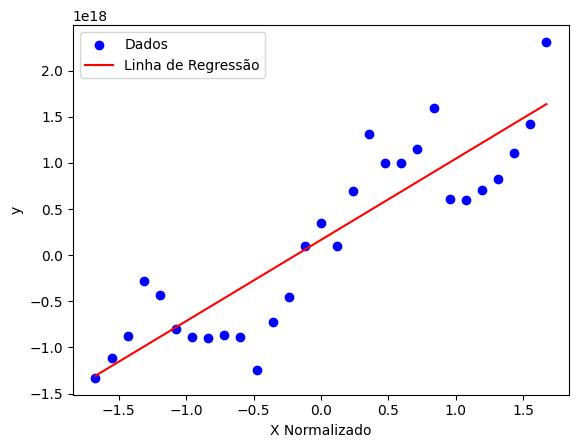

In [7]:


class LinearRegressionSGD:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                random_index = np.random.randint(n_samples)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                y_predicted = np.dot(xi, self.weights) + self.bias
                error = y_predicted - yi
                dw = (2) * np.dot(xi.T, error)
                db = (2) * np.sum(error)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def mean_squared_error(self, X, y):
        # Calcula o MSE
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

# Supondo que X_scaled e y já estejam definidos e normalizados
# X_scaled = scaler.fit_transform(X)  # X é sua matriz de características
# y = ...

model = LinearRegressionSGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_scaled, y)

predictions = model.predict(X_scaled)


print(f"MSE: {model.mean_squared_error(X_scaled, y)}")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")


#Plotando matplotlib
plt.scatter(X_scaled, y, color='blue', label='Dados')
plt.plot(X_scaled, predictions, color='red', label='Linha de Regressão')
plt.xlabel('X Normalizado')
plt.ylabel('y')
plt.legend()
plt.show()


(1, 2)